In [12]:
# External libraries
import pandas as pd
import numpy as np
import janitor
import sys
import os

# Own libraries
sys.path.append(os.path.abspath("../scripts"))
import utils

In [13]:

# Cargar datos
train_data = pd.read_csv("../data/raw/base_train.csv", sep="|")
valid_data = pd.read_csv("../data/raw/base_validacion.csv", sep="|")
test_data = pd.read_csv("../data/raw/base_prueba.csv", sep="|")

In [14]:
train_data.shape # 28 mil datos - 28 columnas

(28276, 28)

# Revisiones generales

En este apartado se propone revisar el estado actual de la informacion. Datos faltantes, lecutra correcta y tipo de datos (consistentes con el diccionario).

In [15]:
print('Datos faltantes\n',
      '============================\n', 
      train_data.isnull().sum())


Datos faltantes
 num_doc         0
f_analisis      0
default         0
tipo_cliente    0
trx39           0
trx102          0
trx106          0
trx143          0
trx158          0
disp309         0
CO01END010RO    0
CO01ACP017CC    0
CO02EXP011TO    0
CO02EXP004TO    0
CO01EXP001CC    0
CO01EXP003RO    0
CO02END015CC    0
CO01END002RO    0
CO01END086RO    0
CO01END094RO    0
CO02NUM086AH    0
CO02NUM043RO    0
CO01EXP002AH    0
CO01NUM002AH    0
CO01END051RO    0
CO01ACP011RO    0
CO02MOR092TO    0
CO01MOR098RO    0
dtype: int64


`No hay datos faltantes`

In [16]:
train_data.tail(3)

,num_doc,f_analisis,default,tipo_cliente,trx39,trx102,trx106,trx143,trx158,disp309,...,CO01END086RO,CO01END094RO,CO02NUM086AH,CO02NUM043RO,CO01EXP002AH,CO01NUM002AH,CO01END051RO,CO01ACP011RO,CO02MOR092TO,CO01MOR098RO
28273,9.824676e+11,201808,0,adicion,0.276385,0.0,0.000000,0.000000,0.010667,8.0,...,80.8,1.28,40.0,0.00,1.0,2.0,1.17,-2.0,100.00000,82.407500
28274,9.850430e+11,201808,0,adicion,0.829156,0.0,0.000003,0.064875,0.006400,7.0,...,-1.0,-1.00,50.0,-1.00,2.0,2.0,-1.00,-1.0,-3.00000,-1.000000
28275,9.959126e+11,201810,0,adicion,0.595119,0.0,0.000001,0.000000,0.007467,8.0,...,111.0,4.74,20.0,42.86,5.0,2.0,8.20,0.0,88.43817,82.158134


In [17]:
# train_data.describe().shape # todo lo tomo numerico
train_data.describe()

,num_doc,f_analisis,default,trx39,trx102,trx106,trx143,trx158,disp309,CO01END010RO,...,CO01END086RO,CO01END094RO,CO02NUM086AH,CO02NUM043RO,CO01EXP002AH,CO01NUM002AH,CO01END051RO,CO01ACP011RO,CO02MOR092TO,CO01MOR098RO
count,2.827600e+04,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,...,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000
mean,4.974533e+11,201808.536285,0.067372,0.675212,0.009988,0.009386,0.157412,0.106482,6.727401,1.714396,...,36.270536,6.353860,44.648904,35.537686,8.179233,2.629898,5.007108,0.180259,72.962840,48.529336
std,2.875796e+11,3.231793,0.250669,1.003746,0.070848,0.068895,0.284814,0.225333,3.952865,4.576126,...,39.832468,13.412629,23.386687,35.573957,13.073666,1.239205,17.239716,2.223357,42.869349,48.958556
min,5.257814e+07,201801.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,...,-4.000000,-4.000000,-3.000000,-1.000000,-1.000000,-1.000000,-4.000000,-3.000000,-3.000000,-3.000000
25%,2.500376e+11,201806.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-1.000000,...,-1.000000,-1.000000,28.570000,0.000000,2.000000,2.000000,-1.000000,-1.000000,47.346860,-1.000000
50%,4.949118e+11,201810.000000,0.000000,0.276385,0.000000,0.000000,0.014986,0.008533,7.000000,0.490000,...,25.670000,2.560000,40.000000,33.330000,6.000000,2.000000,0.700000,0.000000,100.000000,55.881760
75%,7.456302e+11,201811.000000,0.000000,0.953794,0.000006,0.000005,0.185602,0.103468,10.000000,2.700000,...,68.532500,7.680000,57.140000,66.670000,12.000000,3.000000,4.410000,1.000000,100.000000,100.000000
max,9.999384e+11,201812.000000,1.000000,13.231644,2.688028,2.688028,3.755929,3.038751,12.000000,90.030000,...,1276.110000,512.010000,100.000000,100.000000,673.000000,13.000000,872.320000,59.000000,100.000000,100.000000


In [18]:
print(train_data['default'].value_counts(normalize=True))

default
0    0.932628
1    0.067372
Name: proportion, dtype: float64


Como era de esperarse del poderosisimo equipo de Bancolombia, aproximadamente el 93.3 % de los clientes cumplieron los pagos (categorida default = 0) y aproximadamente el 6.7 % de los clientes incumplieron con el pago. 

`Por si solos, estos nombres no dicen mucho. Cambio de nombres!`

Con ChatGPT vamos a crear el diccionario base y una vez lo tengamos, se revisa uno a uno para tener informacion relevante a la mano. 

In [19]:
nombre_actual_a_nuevo = { # Convencion: 
                         # Si termina Telcos -> portafolio productos telcos
                         # Si termina Ahorros - > portafolio al que hace referencia es Ahorros
                         # Si termina Rotation - > portafolio al que hace referencia es Rotativo
                         # Si termina en Total - > portafolio al que hace referencia es Total
    "CO01ACP011RO": "cancel_pos_12m", #ok 
    "CO01ACP017CC": "meses_cancel_telcos", # ok
    "CO01END002RO": "saldo_prom_rotativo", # ok
    "CO01END010RO": "cupo_disp_rotativo", # ok
    "CO01END051RO": "saldo_total_9_meses_rotativo", # ok
    "CO01END086RO": "uso_total_prod_3m_rotativo", # 
    "CO01END094RO": "cupo_max_rotativo", # ok
    "CO01EXP001CC": "meses_apertura_telcos", # ok
    "CO01EXP002AH": "meses_apertura_ahorro", # ok
    "CO01EXP003RO": "meses_apertura_rotativo", # ok
    "CO01MOR098RO": "ponderacion_24m_rotativo", # ok
    "CO01NUM002AH": "productos_abiertos_ahorro", # ok
    "CO02END015CC": "porcentaje_cartera_vencida_telcos", # ok
    "CO02EXP004TO": "meses_apertura_ultimo_prod_total",  # ok
    "CO02EXP011TO": "porcentaje_productos_48meses_total", # ok
    "CO02MOR092TO": "ponderacion_reportes_al_dia_18m_total", # 
    "CO02NUM043RO": "pct_productos_cerrados_rotativo", # ok
    "CO02NUM086AH": "part_ahorro_total",
    "disp309": "version_sistema_operativo",
    "trx102": "monto_min_transado_1m",
    "trx106": "monto_min_transado_2m",
    "trx143": "desv_recargas_pse_12m",
    "trx158": "prom_retiros_atm_12m",
    "trx39": "desv_retiros_atm_12m",
    "num_doc": "id_cliente",
    "f_analisis": "fecha_desembolso",
    "default": "incumplimiento",
    "tipo_cliente": "tipo_cliente"
}

# Renombrar columnas usando el diccionario
train_data.rename(columns=nombre_actual_a_nuevo, inplace=True)

# Limpieza de nombres columnas
train_data = janitor.clean_names(train_data)
train_data.head()

,id_cliente,fecha_desembolso,incumplimiento,tipo_cliente,desv_retiros_atm_12m,monto_min_transado_1m,monto_min_transado_2m,desv_recargas_pse_12m,prom_retiros_atm_12m,version_sistema_operativo,...,uso_total_prod_3m_rotativo,cupo_max_rotativo,part_ahorro_total,pct_productos_cerrados_rotativo,meses_apertura_ahorro,productos_abiertos_ahorro,saldo_total_9_meses_rotativo,cancel_pos_12m,ponderacion_reportes_al_dia_18m_total,ponderacion_24m_rotativo
0,7.283207e+08,201810,0,adicion,1.213352,0.000000,0.000000,0.000000,0.242403,8.0,...,28.24,3.20,28.57,33.33,10.0,2.0,0.99,1.0,100.0,-3.00000
1,1.242291e+10,201801,1,adicion,0.000000,0.000000,0.000001,0.000000,0.000000,8.0,...,-1.00,-1.00,60.00,-1.00,4.0,3.0,-1.00,-1.0,0.0,-1.00000
2,3.419426e+10,201803,0,adicion,0.953794,0.000000,0.000000,0.404773,0.203330,11.0,...,14.56,20.48,75.00,90.91,15.0,3.0,1.50,0.0,100.0,100.00000
3,3.601473e+10,201807,0,adicion,2.236068,0.000010,0.000003,0.424556,1.227298,8.0,...,-3.00,0.38,28.57,0.00,8.0,2.0,-4.00,-2.0,-3.0,-2.00000
4,5.051837e+10,201811,0,adicion,2.361438,0.000001,0.000023,0.000000,0.392063,0.0,...,74.66,32.00,33.33,81.82,16.0,2.0,0.00,3.0,100.0,89.22658


Hasta el momento solo se ha cambiado el nombre de algunas columnas para entenderlas de manera directa. Al mismo tiempo se ha verificado cantidad de datos y numero ne NA's. hasta el momento, nada ha representado una dificultad significativa para procesar los datos. 


In [20]:
# Duplicados: Sin registros duplicados
duplicated_rows = train_data[train_data.duplicated()]
print(f"Número de registros duplicados: {duplicated_rows.shape[0]}")

Número de registros duplicados: 0


In [21]:
# Duplicados en Id: En caso de que exista un cliente analizado 2 veces
train_data['id_cliente'].duplicated().sum() 

np.int64(2277)

`Duplicados en id`

Existen duplicados para la columna Id, implicando que un cliente ha sido analizado varias veces.

# Correcion variables categoricas y numericas

Se busca realziar modificaciones al proceso de lectura. Algunas variables se consideran categoricas y continuas. En este caso, agregando un threshold de 15, se tomaran como variables categoricas aquellas cuyos valores unicos sean menores a 15. De la misma manera, aquellas que tomen valores superiores a 15 en sus nunique values entonces se tomará como continua. **Se hace para agilizar analisis aunque en este caso, al no ser demasiadas variables, se puede revisar manualmente si el cambio aplicado tiene sentido**


In [29]:
train_data, categoricas, continuas =utils.identificacion_categoricas_continuas(df=train_data, 
                                     threshold= 15 # se escoge un threshold de 15)
)

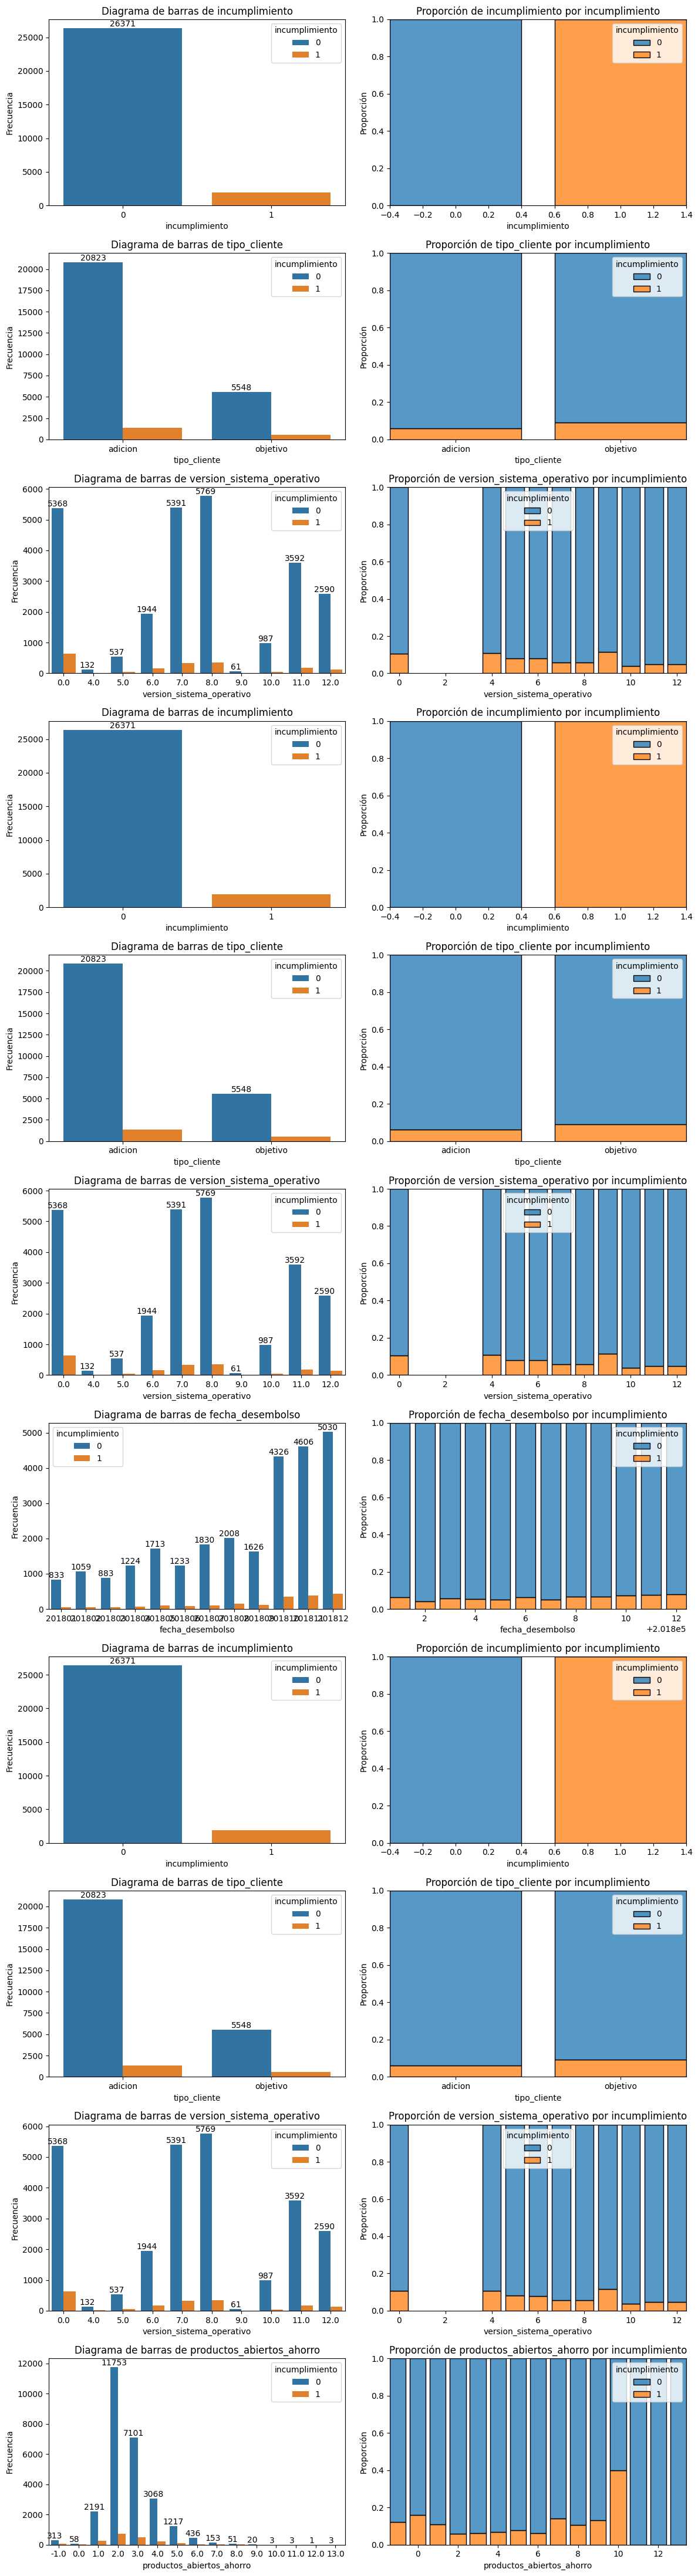

In [105]:
graficar_categoricas(df=train_data, categorias= categoricas, hue = 'incumplimiento' )

`Insigths`

 1) Desbalanceo: En general, la variable de incumplimiento presenta un desbalanceo fuerte entre las dos categorias. Esto implica que de alguna manera, los datos estan sobrecargados de una categoria respecot a la otra. **Esto representa un primer desafio para el mdelo de clasificacion dado que no se puede mdelar una categoria muy sobrecargada**
 
 2) Tipo de cliente:  La mayoria de los datos hacen parte de la categoria 'adicion' es decir; no de la poblacion objetivo. Estop **podría** ser un problema si los datos de la poblacion de adiccion difieren de la poblacion objetivo puesto que al ser una proporcion mayor a lo que se tiene, el modelo podria tomar los datos de esta categoria como referencia principal a la hora de correr el modelo.
    Anexo a esto, tambien se observa que los datos en el cliente de tipo adicion **presenta un indice de incumplimiento de pago mayor** sin embargo esto plantea una pregunta. ¿Es esto por la naturaleza del fenomeno o responde al hecho de que, los datos estan mas cargados en la categoria adiccion y simplemente hay mas personas allí?
    
3) Sistema operativo: La mayoria de los clientes tienen preferencia por los sistemas operativo entre 0,7,8 y 11 aunque, no parece hbaer una tendencia clara respecto al incumplimineto. 

4) Fecha de Desembolso: Se organiza por fecha y se hace un conteo de ambas categorias. No se observa una diferencia significativa respecto a la **proporcion** de incumplimientos a lo largo del tiempo.  
